<a href="https://colab.research.google.com/github/ElenaPeralPastor/MINERIA/blob/main/E1P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4. Ejercicio 1 (Calidad del vino)

Una tienda online de venta de vino quiere hacer un estudio de mercado. Han descubierto que muchos clientes valoran como buenos o muy buenos vinos que no son tan conocidos. Con la intención de adelantarse a la competencia quiere encontrar qué factores podrían influir más en esta elección. Usando el archivo vinos.csv y para 5 de las características que consideres que más influyen: calcula y establece qué tipo de relación hay entre ellas, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido y por último haz una predicción con varios datos.

**LECTURA DE DATOS**

In [1]:
import pandas as pd
import numpy as np

filename = 'vinos.csv'
data = pd.read_csv(filename)

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**LIMPIEZA DE DATOS**
* 1. Completitud

Se comenzará comprobando y eliminando nos valores NaN del data frame, puesto que suponen un problema para las técnicas de data mining.

In [3]:
data = pd.DataFrame(data)

total_nan_values = data.isnull().sum()
total_nan_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* 2. Evitar datos redundantes

Se comprobará si existen datos redundantes en el dataframe que puedan complicar el estudio, serán eliminados aquellos datos duplicados o inconsistentes en varias tablas.

En este caso las variables del dataframe no tienen características únicas.

* 3. Datos incorrectos o inconsistentes



Parece que no hay datos inconsistentes.

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* 4. Errores de transcripción y variaciones en las referencias a los mismos conceptos

Al no haber datos categóricos no hay errores de transcripción.

* 5. Valores atípicos (Outliers)


Pese que hay outliers, los datos no se alejan mucho del rango, por lo cual los daremos como válidos.

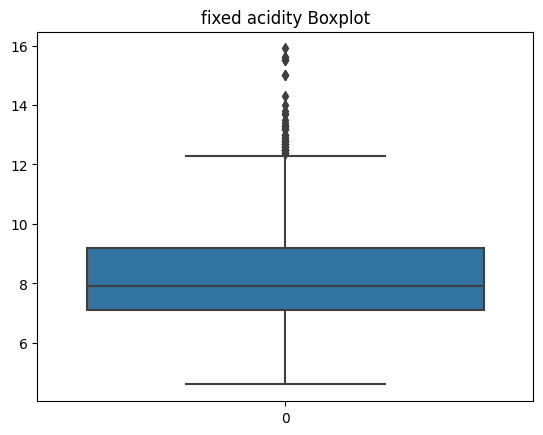

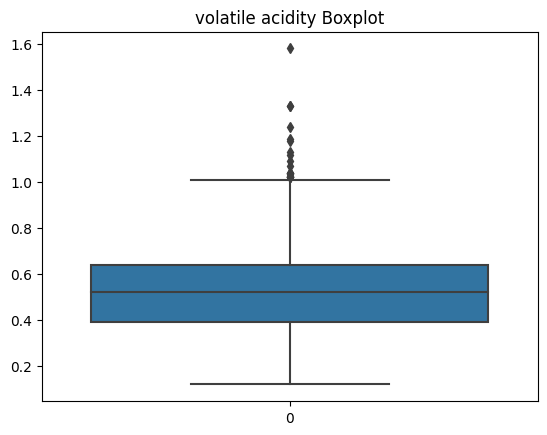

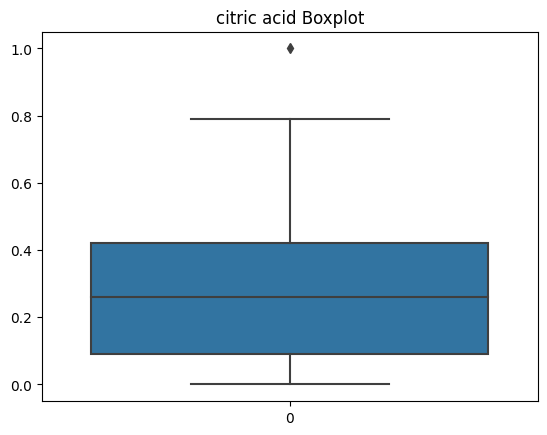

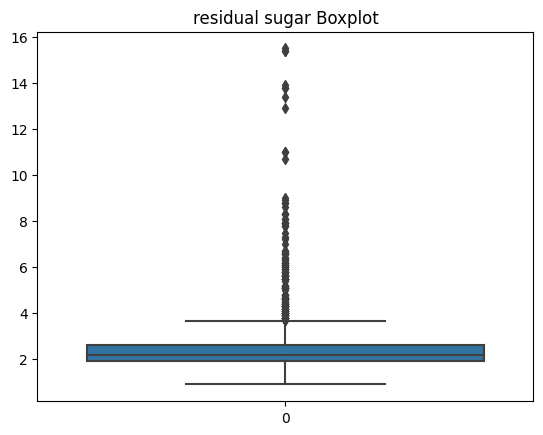

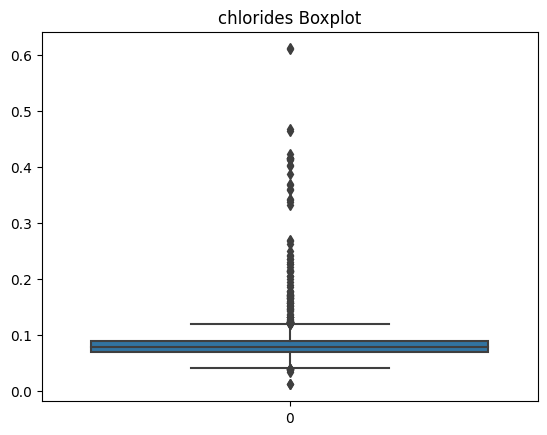

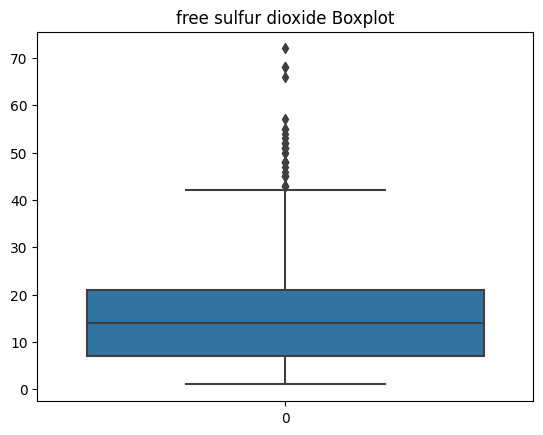

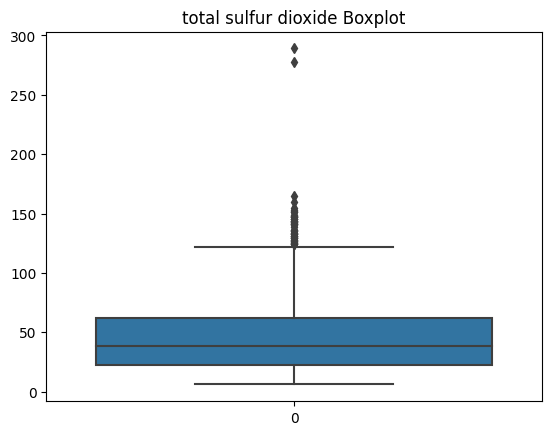

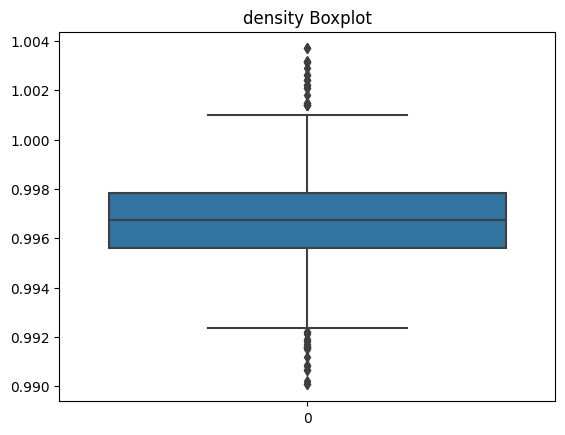

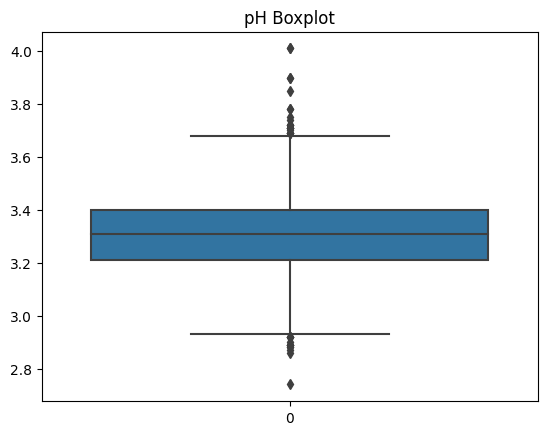

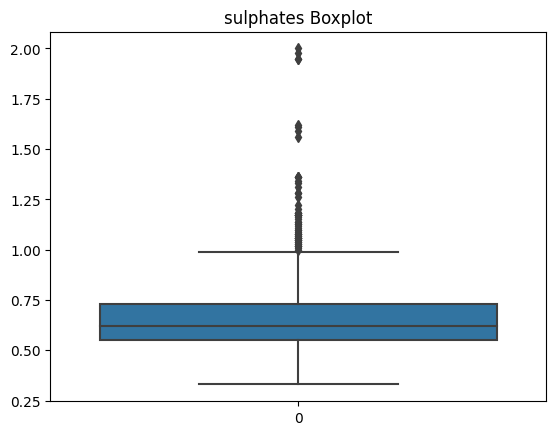

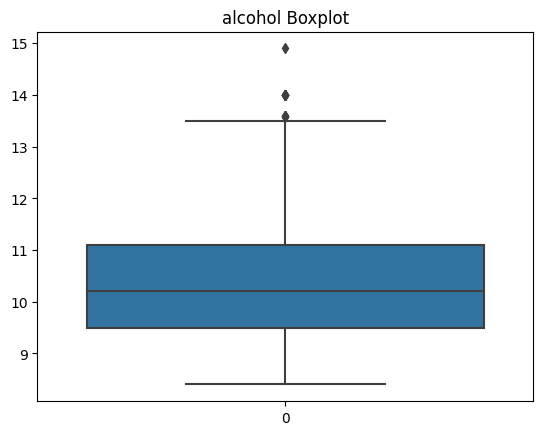

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las variables excepto la última
variables = list(data.columns[:-1])

# Crear un boxplot para cada variable
for var in variables:
    sns.boxplot(data=data[var])
    plt.title(f"{var} Boxplot")
    plt.show()


### 1) ¿Qué diferencias hay entre los 5 modelos? (1,5 puntos)

### Para 5 de las características que consideres que más influyen: calcula y establece qué tipo de relación hay entre ellas, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido y por último haz una predicción con varios datos.

**Elección de las variables independientes**

Las variables escogidas para el estudio de 'quality' son:
* 'fixed acidity'
* 'volatile acidity'
* 'citric acid'
* 'residual sugar'
* 'alcohol'




**Cálculo y relación entre las variables seleccionadas**

A continuación se realizar un corrplot para observar la relación que tiene cada variable independiente con las demás.

Como se puede ver la relación que hay entre las variables es:
* 'fixed acidity' y 'volatile acidity' = -0.26 relación inversa, cuando una crece la otra decrece y viceversa.
* 'fixed acidity' y 'citric acid' = 0.67 relación directa moderadamente fuerte entre las variables. A medida que aumenta la cantidad de ácido cítrico en el vino, también aumenta la cantidad de acidez fija en el vino.

* 'fixed acidity' y 'residual sugar' = 0.11 relación directa. A medida que una aumenta la otra también.
* 'fixed acidity' y 'alcohol'= -0.062. Cuando el contenido de alcohol aumenta, el nivel de acidez fija disminuye ligeramente, pero la relación es muy baja, por lo cual no se considera significativa.
* 'volatile acidity' y 'citric acid' = -0.55. Relación inversa, cuando una crece la otra decrece y viceversa.
* 'volatile acidity' y 'residual sugar' = 0.0019, no hay una relación lineal significativa entre estas dos variables.
* 'volatile acidity' y 'alcohol'= -0.2, aumento en el contenido de alcohol implica una disminución en el contenido de ácido volátil.
* 'residual sugar' y 'alcohol' = 0.042, tienen una correlación débil positiva.
* 'citric acid' y 'alcohol' = 0.11 relación directa.
* 'citric acid' y 'residual sugar' = = 0.14 relación directa.

<Axes: >

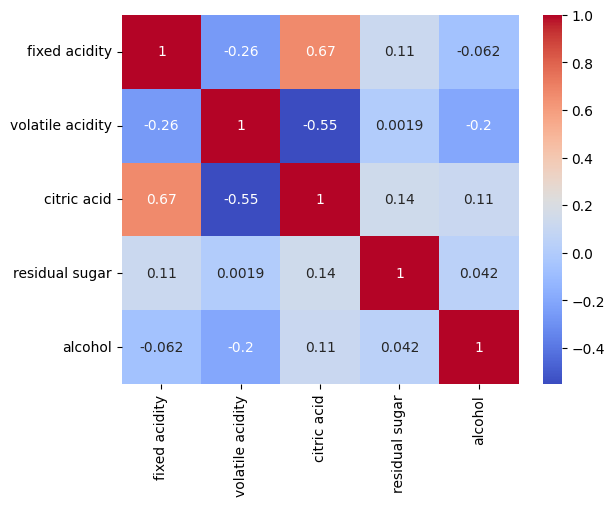

In [6]:
import seaborn as sns

# Calcular matriz de correlación
corr = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']].corr()

# Graficar mapa de calor
sns.heatmap(corr, annot=True, cmap='coolwarm')


* Dibuja un diagrama de dispersión con los casos.

Se ha realizado un diagrama de dispersión para ver mejor la relación de cada variable.

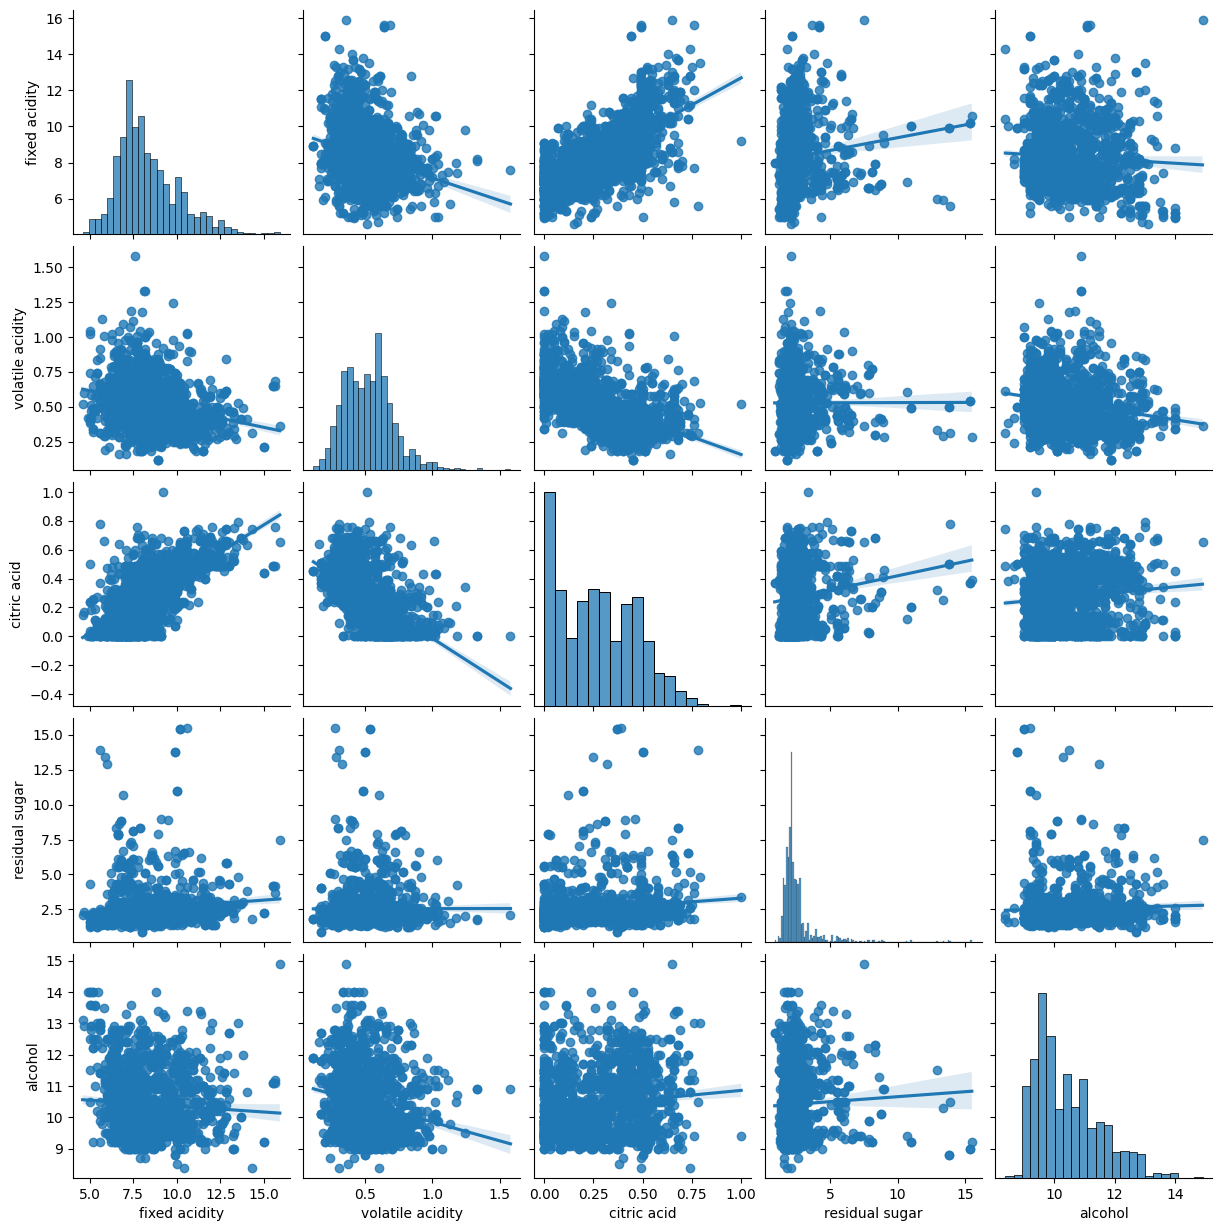

In [7]:
import seaborn as sns

# Seleccionar las variables independientes
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']

# Crear una matriz de gráficos de dispersión y rectas de regresión lineal para cada par de variables
sns.pairplot(data[variables], kind='reg')


Como 'quality' es una variable categórica, se ha realizado un diagrama de barras para ver la relación de cada variable con ella.

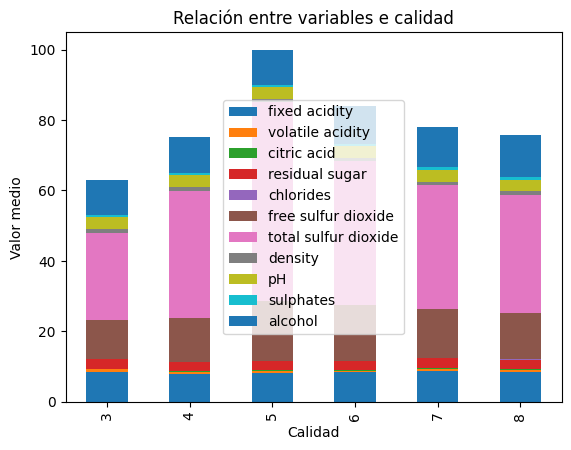

In [8]:
# Agrupamos por calidad y calculamos la media de cada variable

grouped_data = data.groupby('quality').mean()
import matplotlib.pyplot as plt

# Creamos el gráfico de barras apiladas
grouped_data.plot.bar(stacked=True)

# Configuramos los ejes y el título
plt.xlabel('Calidad')
plt.ylabel('Valor medio')
plt.title('Relación entre variables e calidad')
plt.show()

* Modelo de Regresión Logística con las 5 variables independientes escogidas: 

En el enunciado se indica que se debe realizar un gráfico de dispersión con el modelo obtenido, pero no es posible realizar un gráfico de dispersión de un modelo de regresión logística. En su lugar se ha realizado la matriz de confusión.

Se ha obtenido un accuracy del 54% lo que indica que las variables seleccionadas para determinar la calidad del vino no son apropiadas, o los datos escogidos no son los adecuads o la falta de variables, entre muchas otras razones.

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Seleccionar las variables independientes
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[variables], data['quality'], test_size=0.2, random_state=42)

# Crear modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Mostrar resultados de la clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.78      0.67       130
           6       0.50      0.48      0.49       132
           7       0.33      0.17      0.22        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.24      0.24      0.23       320
weighted avg       0.49      0.54      0.50       320



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

* Predicción con varios datos.

Se ha creado un nuevo DataFrame con los datos de tres posibles vinos. Después se ha utilizado el modelo ya entrenado (model) para predecir la calidad del vino para los nuevos datos (new_data). Las predicciones se almacenan en y_new_pred.

Se ha obtenido que el primero tiene calidad 5, el segundo 6 y el tercero 7.

In [10]:
# DataFrame con los nuevos datos
new_data = {'fixed acidity': [7.2, 6.6, 9], 'volatile acidity': [0.45, 0.26, 0.4], 
            'citric acid': [0.36, 0.31, 0.25], 'residual sugar': [1, 1.6, 2.3], 'alcohol': [5, 10, 15]}
new_df = pd.DataFrame(new_data)

# Se predicen los nuevos resultados
y_new_pred = model.predict(new_df)
print(y_new_pred)

[5 6 7]


Se han probado varios ejemplos con valores muy extremos y se ha llegado a la conclusión de que el alcohol afecta mucho a la calidad del vino. Para el siguiente ejercicio se ha elegido esta variable junto a fixed acidity y residual sugar puesto que son las variables con las que menos esta correlada (que más se acerca a 0 su correlación), ya que así evitamos usar una variable que pueda estar muy explicada por el alcohol.

### 2) Explica cómo funcionaría el posible sistema para clasificar vinos (simplifica la variable “quality” creando 4 clases: muy malo, malo, bueno, muy bueno) creado con los 3 parámetros que más influyen entre los descritos arriba. (0,5 puntos)

La variable quality es una variable categórica la cual puede obtener números enteros del 1 al 10. Por lo tanto para predecir el valor de quality se debe realizar mediante una regresión logística.



Primero se importan las librerías necesarias para realizar la regresión lgística.

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

A continuación se verán los números que contiene quality en nuestro DataFrame para poder realizar la división de las cuatro categorías.

In [12]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

* Si quality es 1, 2 o 3, se asigna la categoría "muy malo"
* Si quality es 4 o 5, se asigna la categoría "malo"
* Si quality es 6 o 7, se asigna la categoría "bueno"
* Si quality es 8, 9 o 10, se asigna la categoría "muy bueno"

Mediante el siguiente código se realiza la división:

In [13]:
data['quality'] = data['quality'].apply(lambda x: 'muy malo' if x <= 3 else 'malo' if x <= 5 else 'bueno' if x <= 7 else 'muy bueno')


A continuación se separan las variables independientes de la dependiente.

In [14]:
X = data[['fixed acidity', 'residual sugar', 'alcohol']]
y = data['quality']

In [15]:
# Dividir el conjunto de datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Crear modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Una vez entrenado el modelo, se pueden utilizar nuevas observaciones de las tres variables independientes para realizar la clasificación del vino. Este predecirá en que categoría se clasificaría según las características proporcionadas.

In [17]:
# Hacer predicciones en conjunto de prueba
y_pred = model.predict(X_test)

In [18]:
# Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Hacer predicciones para nuevos datos
new_data = [[7.1, 1, 10], [6.8, 0.48, 0.29]]
new_pred = model.predict(new_data)
print("Predicciones para nuevos datos:", new_pred)

Precisión del modelo: 69.38%
Predicciones para nuevos datos: ['malo' 'malo']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
